In [12]:
import pandas as pd
import re
import numpy as np
import datetime as dt

df = pd.read_csv('serie-storiche-ecommerce.csv', sep = ',', dtype = {'settore': str, 'data': str, 'totale': str})
df = df.reset_index()

#costruiamo ed impostiamo un nuovo indice
index_list = []
for row in range(len(df)):
  index_list.append(row)
df['new_index'] = index_list
df = df.set_index('new_index')
df.head()

,index,data,totale,settore
new_index,,,,
0,2013-02-01,'815,97',Calcio
1,2013-02-21,'4775,75',Fitness
2,2013-04-01,'4775,75',Fitness
3,2013-04-06,'1962,15',Casual
4,2013-07-09,'1809,87',Basket


### Controlliamo i dati a disposizione

#### Avendo usato come separatore colonna la virgola, gli importi sono stati divisi nelle due colonne 'data' e 'totale'. 

In [13]:
df[df['settore'].isnull()]
## I dati mancanti di 'settore' si trovano nella colonna 'totale'
# df[df['totale'].isnull()]
# df[df['data'].isnull()]
# df[df['index'].isnull()]

,index,data,totale,settore
new_index,,,,
204,2014-03-01,4880,Calcio,NaN
282,2014-03-13,4451,Running,NaN
354,2014-03-25,10055,Casual,NaN
510,2014-04-15,14559,Running,NaN
715,2014-05-16,9340,Casual,NaN
...,...,...,...,...
24301,2021-12-12,17381,Pesca,NaN
24385,2021-12-21,2729,Buoni / acconti,NaN
24542,2022-01-12,2729,Buoni / acconti,NaN


### Preprocessing

#### Rimuoviamo le virgolette all'inzio di ogni valore in 'data' e alla fine di 'totale'.
#### Sostituiamo i valori mancanti di 'settore' con i valori che si trovano in 'totale'. 

In [14]:
for el in range(len(df)):
    df['data'][el] = df['data'][el].strip('\'')
    df['totale'][el] = df['totale'][el].strip('\'')
    if df['settore'][el] is np.nan:
        df['settore'][el] = df['totale'][el]
        df['totale'][el] = str(0)
    
df[df['settore'].isnull()]
df[df['totale'] == '0']

,index,data,totale,settore
new_index,,,,
204,2014-03-01,4880,0,Calcio
282,2014-03-13,4451,0,Running
354,2014-03-25,10055,0,Casual
510,2014-04-15,14559,0,Running
715,2014-05-16,9340,0,Casual
...,...,...,...,...
24301,2021-12-12,17381,0,Pesca
24385,2021-12-21,2729,0,Buoni / acconti
24542,2022-01-12,2729,0,Buoni / acconti


#### Uniamo i valori di 'data' e 'totale' nella colonna totale e trasformiamo in float

In [15]:
df['totale'] = df['data'] + '.' + df['totale']
df['totale'] = df['totale'].astype(float)
df['data'] = df['index']
del[df['index']]
# Cambiamo il formato 'data'
df['data'] = pd.to_datetime(df['data'])
df

,data,totale,settore
new_index,,,
0,2013-02-01,815.97,Calcio
1,2013-02-21,4775.75,Fitness
2,2013-04-01,4775.75,Fitness
3,2013-04-06,1962.15,Casual
4,2013-07-09,1809.87,Basket
...,...,...,...
25256,2022-04-06,513.87,Sci
25257,2022-04-07,6076.12,Casual
25258,2022-04-07,597.65,Fitness


In [16]:
df[df['data'].isnull()]
df[df['totale'].isnull()]
df[df['settore'].isnull()]

,data,totale,settore
new_index,,,


#### Dividiamo 'data' in Anno, Mese, Giorno. (Comodo per le visualizzazioni)

In [17]:
df['Anno'] = df['data'].dt.year
df['Mese'] = df['data'].dt.month
df['Giorno'] = df['data'].dt.day

In [18]:
def month_rename(dataset):
    mesi = ['Gennaio', 'Febbraio', 'Marzo', 'Aprile', 'Maggio', 'Giugno', 'Luglio', 'Agosto', 'Settembre', 'Ottobre', 'Novembre', 'Dicembre']
    for x in range(len(dataset)):
        dataset['Mese'][x] = mesi[int(dataset['Mese'][x])-1]
    return(dataset['Mese'])
month_rename(df)

<ipython-input-18-c7a39c5cfd07>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Mese'][x] = mesi[int(dataset['Mese'][x])-1]
C:\Users\Tommi\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


new_index
0        Febbraio
1        Febbraio
2          Aprile
3          Aprile
4          Luglio
           ...   
25256      Aprile
25257      Aprile
25258      Aprile
25259      Aprile
25260      Aprile
Name: Mese, Length: 25261, dtype: object

In [194]:
## Eliminiamo valori negativi di 'totale'
print(len(df))
df.drop(index = df.loc[df['totale'] <0].index, inplace = True)
print(len(df))

25261
25260


In [195]:
df.to_csv('serie-storiche-ecommerce-pulito.csv')

## Visualizzazioni:
### Istogrammi per prime 5 categorie più numerose per anni
### 

## Visualizzazioni esplorative

#### Consideriamo le frequenze: annuali, mensili, decadali, settimanli, giornaliere

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
import matplotlib as mpl
from datetime import datetime
import numpy as np
# # Dovendo aprire diversi grafici insieme, questo passaggio permette di salvare memoria
# mpl.rc('figure', max_open_warning = 0)


In [20]:
df = pd.read_csv('serie-storiche-ecommerce-pulito.csv') 


In [21]:
df['data'] = pd.to_datetime(df['data'])
df['Mese (n°)'] = df['data'].dt.month
df = df.sort_values('Mese (n°)')

In [22]:
df.groupby('settore', as_index = False).count().sort_values('data', ascending = False).head(5)
# Somma freq = 13940

,settore,new_index,data,totale,Anno,Mese,Giorno,Mese (n°)
18,Pesca,2978,2978,2978,2978,2978,2978,2978
6,Calcio,2956,2956,2956,2956,2956,2956,2956
7,Casual,2900,2900,2900,2900,2900,2900,2900
10,Fitness,2834,2834,2834,2834,2834,2834,2834
21,Running,2271,2271,2271,2271,2271,2271,2271


## Aggiungiamo le date mancanti con valori di 'totale' = 0
### Escludiamo l'anno 2013 perchè ha poche osservazioni


In [24]:
ls = ['Pesca', 'Calcio', 'Casual', 'Fitness', 'Running']
diz = {}
for el in ls:
    # Estrai il dataset utile (per ogni settore, dal 2013 in poi) 
    df1 = df[(df['settore'] == el) & (df['Anno'] > 2013)]
    # Periods = (2022-2014)*365 + (22/4/2022 - 1/1/2022)
    dt_datelist = pd.date_range(datetime(2014, 1, 1), 
                                periods=(365*8 + int((datetime(2022, 4, 22)-datetime(2022, 1, 1)).days))).tolist()
    # Costruiamo un nuovo dataset
    dt = pd.DataFrame(dt_datelist, columns = ['data'])                                  
    dt = dt.merge(df[df['settore'] == el], on = 'data', how = 'left')
    dt['totale'] = dt['totale'].replace(np.nan, int(0))
    dt['settore'] = dt['settore'].replace(np.nan, el)
    dt['Anno'] = dt['data'].dt.year
    dt['Mese'] = dt['data'].dt.month
    dt['Giorno'] = dt['data'].dt.day
    dt['Mese (n°)'] = dt['data'].dt.month
    diz[el] = dt

df2 = diz['Pesca']
for el in ls[1:]:
    df2 = pd.concat([df2, diz[el]], ignore_index = True)
month_rename(df2)



<ipython-input-18-c7a39c5cfd07>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Mese'][x] = mesi[int(dataset['Mese'][x])-1]
C:\Users\Tommi\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0        Gennaio
1        Gennaio
2        Gennaio
3        Gennaio
4        Gennaio
          ...   
15150     Aprile
15151     Aprile
15152     Aprile
15153     Aprile
15154     Aprile
Name: Mese, Length: 15155, dtype: object

In [32]:
# df2.to_csv('serie-storiche-ecommerce-pulito-no-buchi-temporali.csv')
df2 = pd.read_csv('serie-storiche-ecommerce-pulito-no-buchi-temporali.csv', index_col = 'Unnamed: 0')
del[df2['new_index']]
df2.head(2)
df2.tail()

,data,totale,settore,Anno,Mese,Giorno,Mese (n°)
15150,2022-04-15,0.0,Running,2022,Aprile,15,4
15151,2022-04-16,0.0,Running,2022,Aprile,16,4
15152,2022-04-17,0.0,Running,2022,Aprile,17,4
15153,2022-04-18,0.0,Running,2022,Aprile,18,4
15154,2022-04-19,0.0,Running,2022,Aprile,19,4


### Visualizzazione annuale per primi 2 settori più numerosi. Dataset pulito

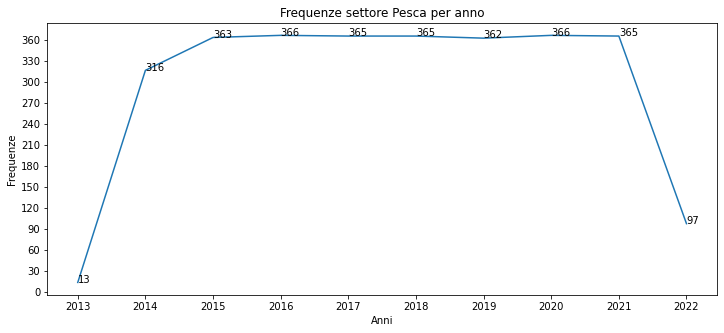

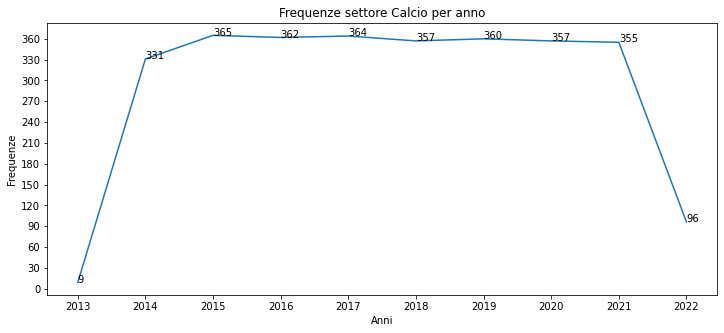

In [27]:
ls = ['Pesca', 'Calcio']#, 'Casual', 'Fitness', 'Running']
for el in ls:
    # Costruiamo il dataset utile (freq annuali per ogni settore)
    dv = df[df['settore'] == el].groupby(['Anno'], as_index = False).count().rename(columns={'totale': 'freq'})[['Anno', 'freq']]
    # Corpo della visualizzazione
    plt.figure(figsize=(12,5))
    x = dv['Anno'].to_list()
    y = dv['freq'].to_list()
    # Parte Estetica 
    plt.xticks(x)
    plt.yticks(range(0,366,30))
    plt.xlabel('Anni')
    plt.ylabel('Frequenze')
    plt.plot(x, y)
    plt.title('Frequenze settore {} per anno'.format(el))
    # Mostra valori esatti per ogni osservazione
    for i,j in zip(x,y):
        plt.annotate(str(j),xy=(i,j))

### Visualizzazione mensile per i 2 settori più numerosi

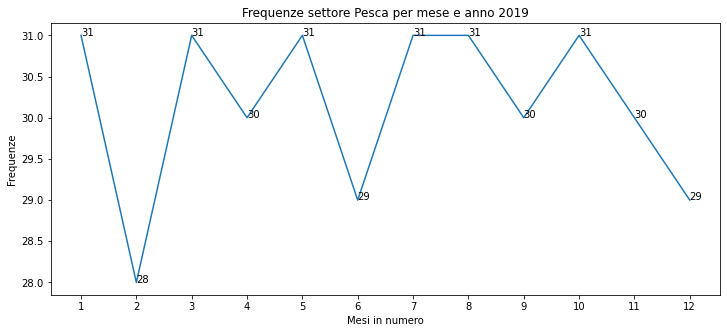

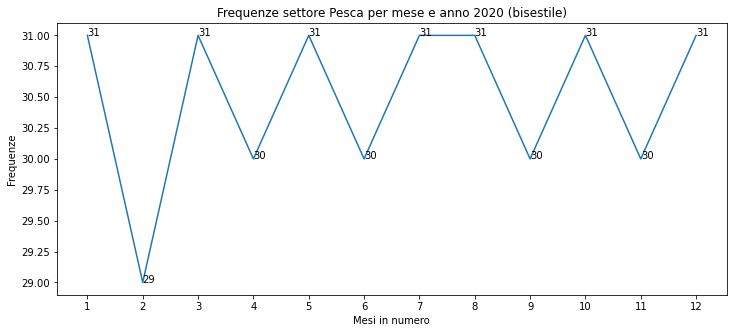

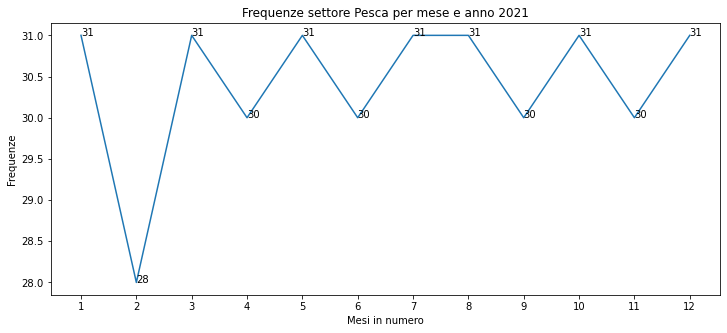

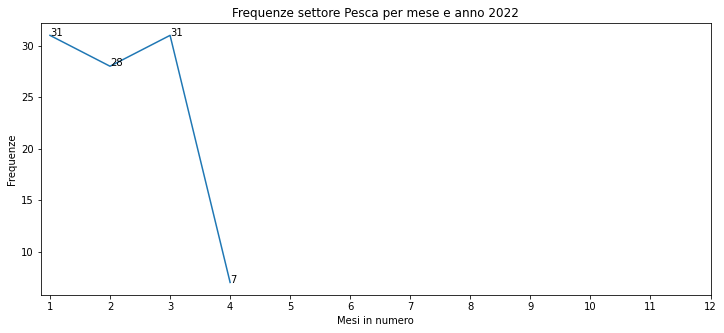

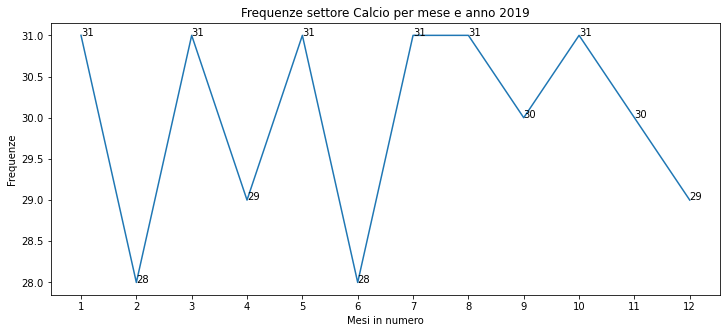

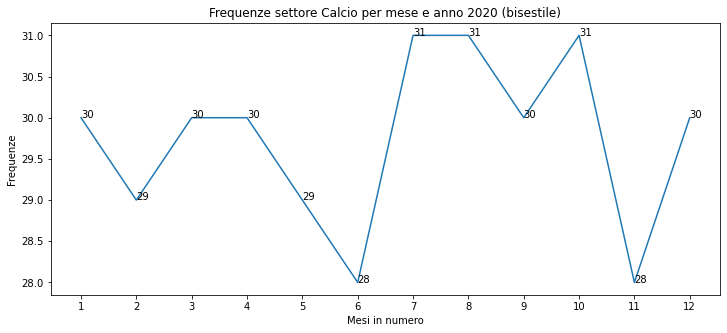

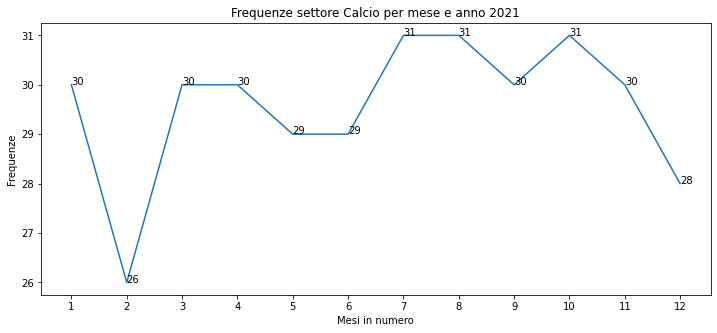

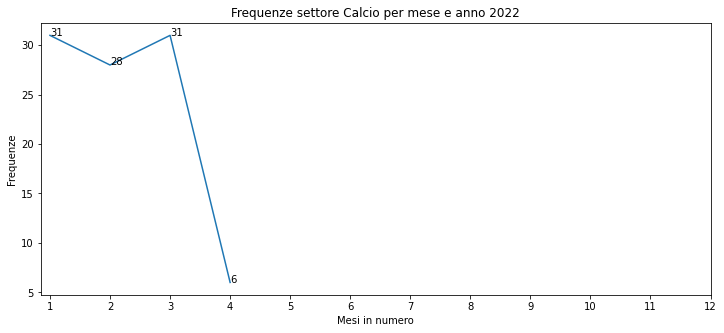

In [33]:
ls = ['Pesca', 'Calcio']#, 'Casual', 'Fitness', 'Running']
years = [i for i in range(2019,2023)]
for el in ls:
    # Dataset utile (frequenze mensili per ogni anno e per ogni settore)
    dv = df[df['settore'] == el]
    for year in years:
        dv1 = dv[dv['Anno'] == year]
        dv2 = dv1.groupby(['Mese (n°)'], as_index = False).count().rename(columns={'new_index': 'freq'})[['Mese (n°)', 'freq']]
        # Corpo visualizzazione
        plt.figure(figsize=(12,5))
        x = dv2['Mese (n°)']
        y = dv2['freq']
        plt.plot(x, y)
        # Parte Estetica
        plt.xticks(range(1,13))
        plt.xlabel('Mesi in numero')
        plt.ylabel('Frequenze')
        plt.title('Frequenze settore {} per mese e anno {}'.format(el, str(year)))
        # Mostra valori esatti per ogni osservazione
        for i,j in zip(x,y):
            plt.annotate(str(j),xy=(i,j))
        if year == 2016 or year == 2020:
            plt.title('Frequenze settore {} per mese e anno {} (bisestile)'.format(el, str(year)))
            


### Visualizzazioni 'totale' per anno per i 2settori più numerosi. Dataset senza buchi temporali

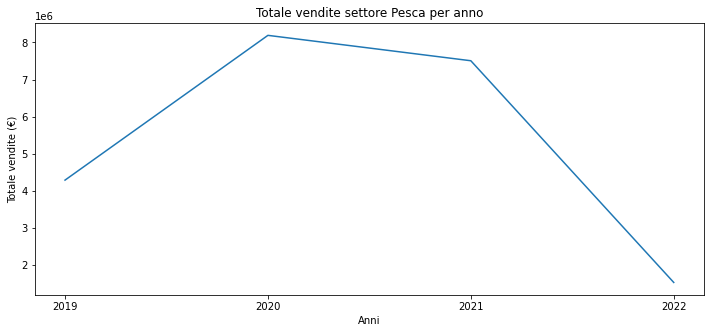

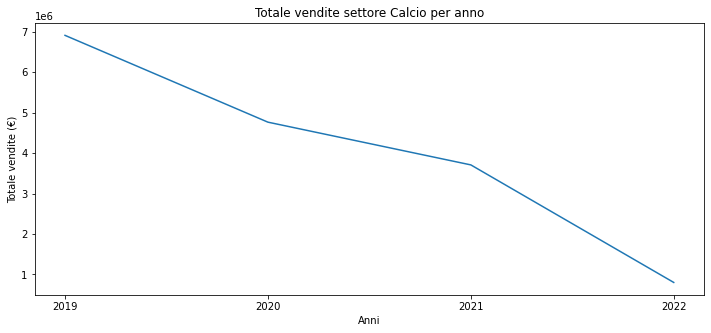

In [36]:
ls = ['Pesca', 'Calcio']#, 'Casual', 'Fitness', 'Running']
for el in ls:
    # Dataset utile (totale vendite annuali per ogni settore)
    dv = df2[(df2['settore'] == el) & (df2['data'] > '2019-04-18')].groupby(['Anno'], as_index = False).sum('totale')[['Anno', 'totale']]
    # Corpo visualizzazione    
    plt.figure(figsize=(12,5))
    x = dv['Anno']
    y = dv['totale']
    # Estetica
    plt.xticks(x)
    plt.plot(x, y)
    plt.xlabel('Anni')
    plt.ylabel('Totale vendite (€)')
    plt.title('Totale vendite settore {} per anno'.format(el))
#     for i,j in zip(x,y):
#         plt.annotate(str(j),xy=(i,j))

### Visualizzazioni 'totale' per mese per i 5 settori più numerosi. Dataset senza buchi temporali

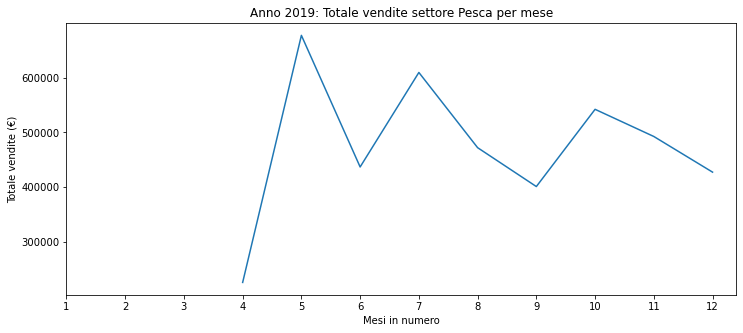

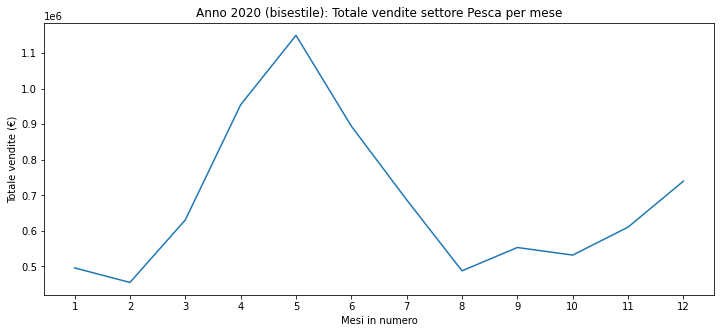

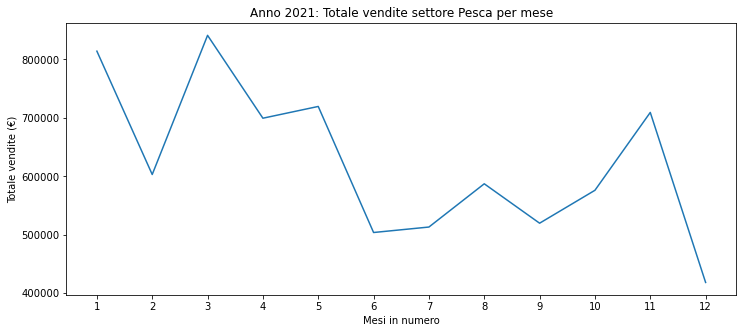

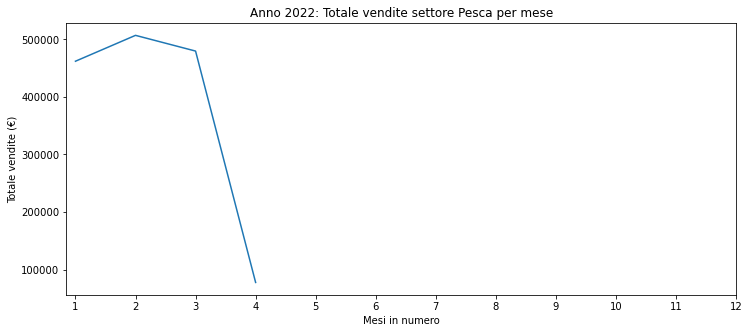

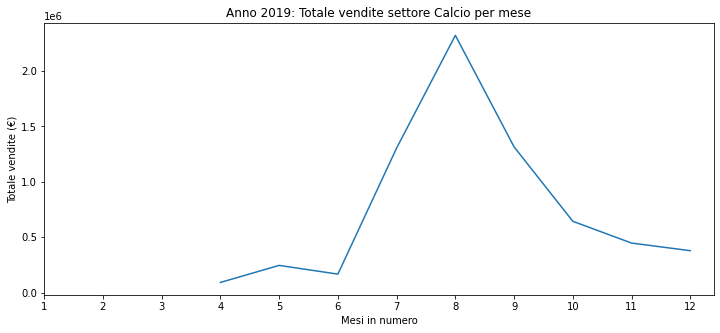

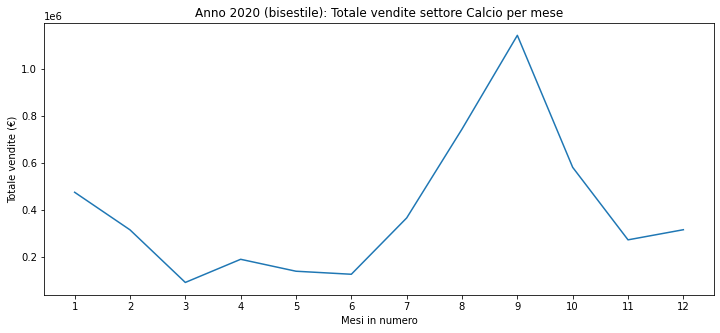

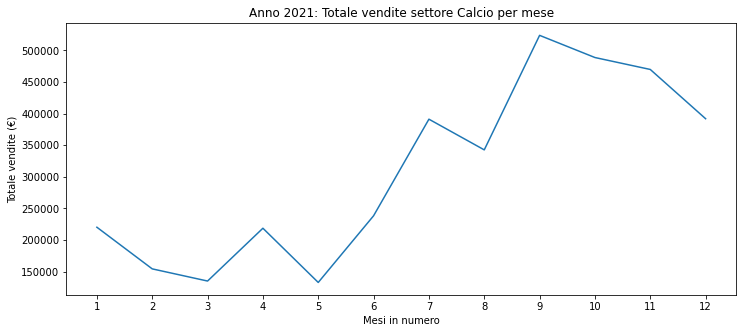

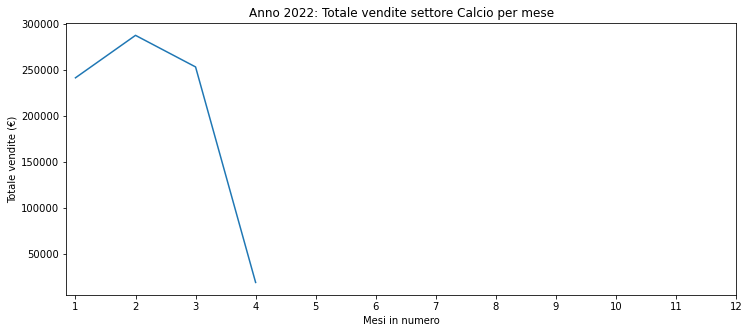

In [38]:
ls = ['Pesca', 'Calcio']#, 'Casual', 'Fitness', 'Running']
years = [i for i in range(2019,2023)]
for el in ls:
    # Dataset utile (totale vendite per ogni mese per ogni anno e settore)
    dv = df2[(df2['settore'] == el) & (df2['data'] > '2019-04-18')]
    for year in years:
        dv1 = dv[dv['Anno'] == year]
        dv2 = dv1.groupby(['Mese (n°)'], as_index = False).sum('totale').round(2)[['Mese (n°)', 'totale']]
        # Corpo
        plt.figure(figsize=(12,5))
        x = dv2['Mese (n°)']
        y = dv2['totale']
        plt.plot(x, y)
        # Estetica
        plt.xticks(range(1,13))
        plt.xlabel('Mesi in numero')
        plt.ylabel('Totale vendite (€)')
        plt.title('Anno {}: Totale vendite settore {} per mese'.format(str(year), el))
#         # Mostra valori esatti per ogni osservazione
#         for i,j in zip(x,y):
#             plt.annotate(str(j),xy=(i,j))
        if year == 2016 or year == 2020:
            plt.title('Anno {} (bisestile): Totale vendite settore {} per mese'.format(str(year), el))

### Visualizzazioni 'totale' per giorno per i 5 settori più numerosi. Dataset senza buchi temporali

In [41]:
# ls = ['Pesca', 'Calcio']#, 'Casual', 'Fitness', 'Running']
# years = [i for i in range(2019,2023)]
# months = [m for m in range(1,13)]
# for el in ls:
#     # Dataset utile (totale vendite per settore per ogni giorno di ogni mese e anno)
#     dv = df2[(df2['settore'] == el) & (df2['data'] > '2019-04-18')]
#     for year in years:
#         dv1 = dv[dv['Anno'] == year]
#         for month in months:
#             if month in dv1['Mese (n°)'].unique():
#                 dv1 = dv1.sort_values('Giorno')
#                 dv2 = dv1[dv1['Mese (n°)'] == month]
#                 # Corpo
#                 plt.figure(figsize=(12,5))
#                 x = dv2['Giorno']
#                 y = dv2['totale']
#                 plt.plot(x, y)
#                 # Estetica
#                 plt.xticks(range(1,32))
#                 plt.xlabel('Giorni')
#                 plt.ylabel('Totale vendite')
#                 plt.title('{}-{}: totale vendite per settore {}'.format(str(month), str(year), el))
#                 # Mostra valori esatti per ogni osservazione
# #                 for i,j in zip(x,y):
# #                     plt.annotate(str(j),xy=(i,j))
#                 if year == 2016 or year == 2020:
#                     plt.title('{}-{} (bisestile): totale vendite per settore {}'.format(str(month), str(year), el))

### Totale vendite giornaliere in un anno

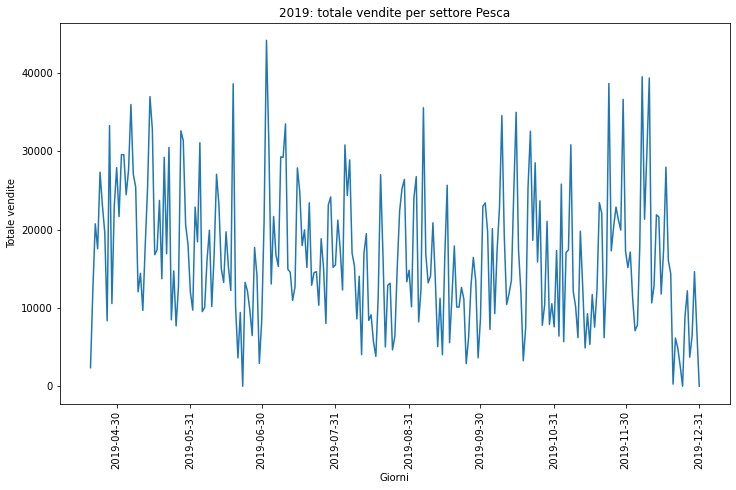

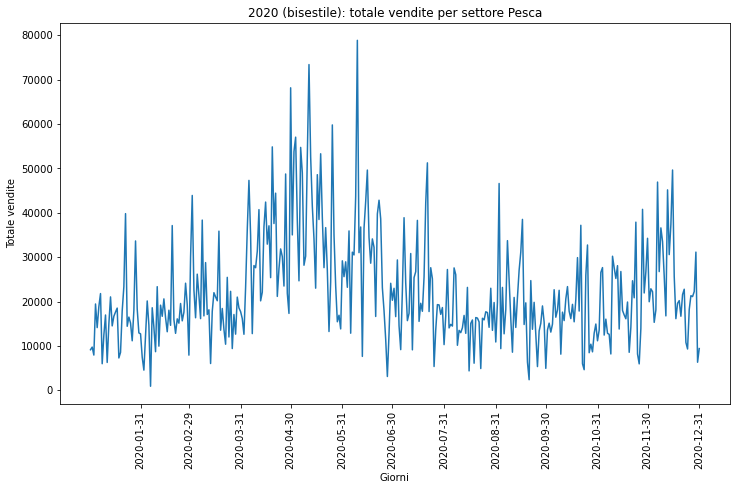

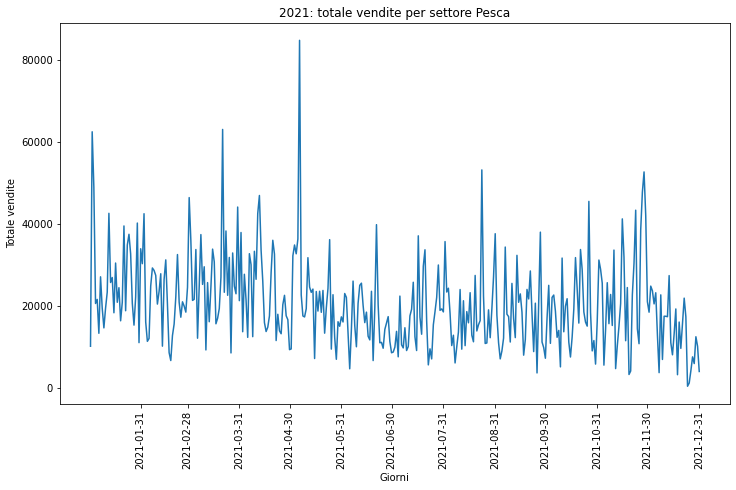

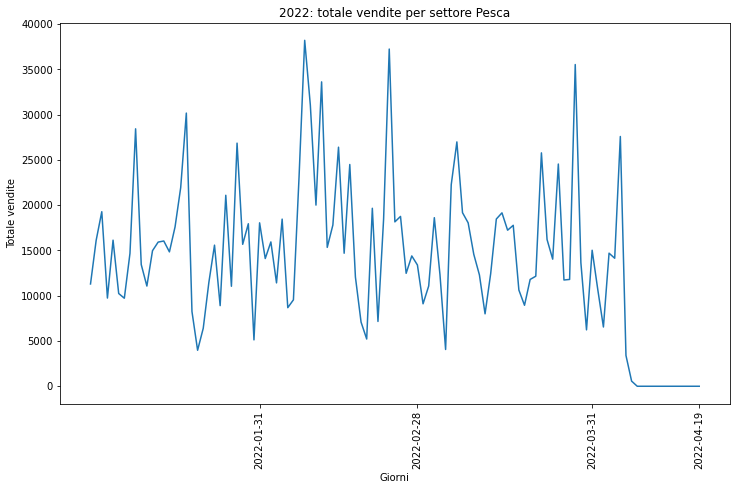

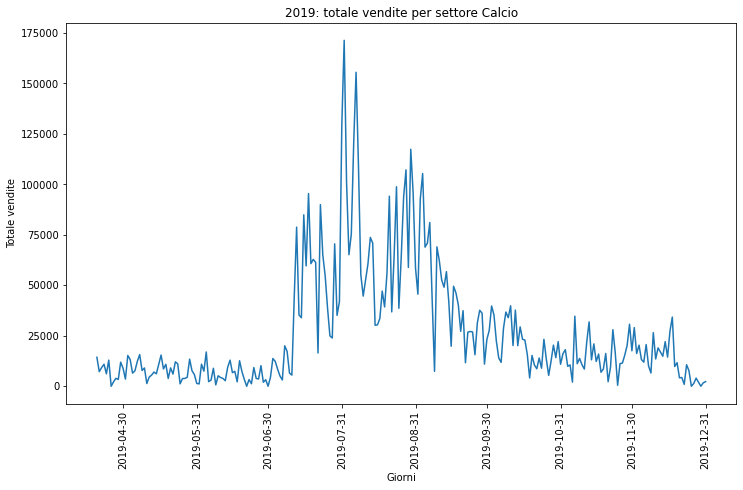

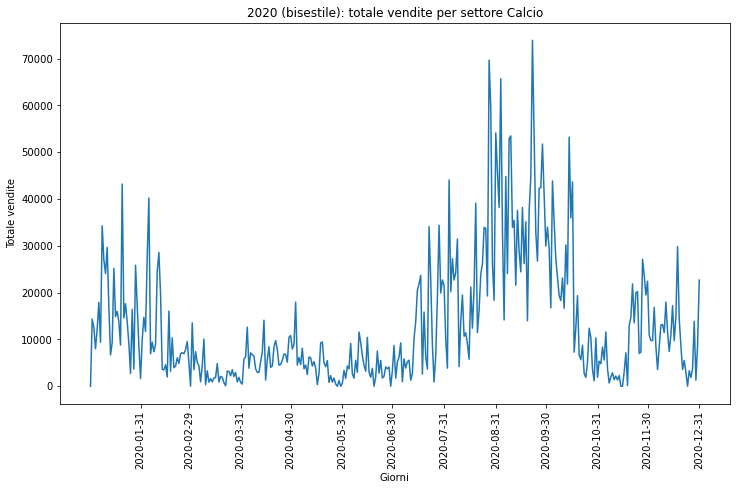

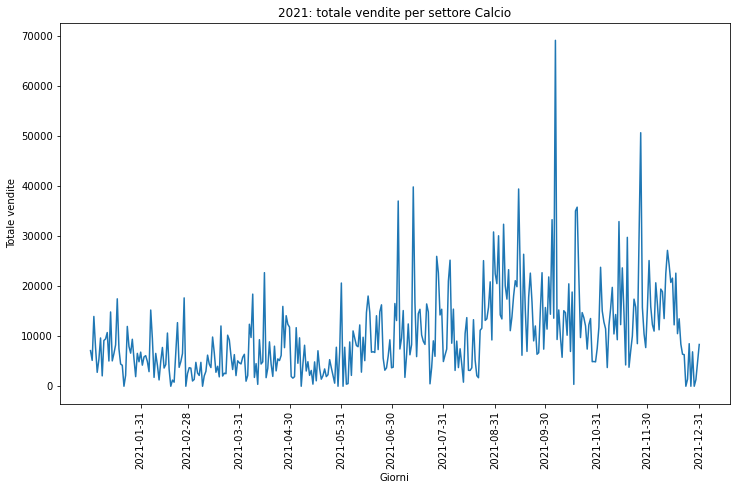

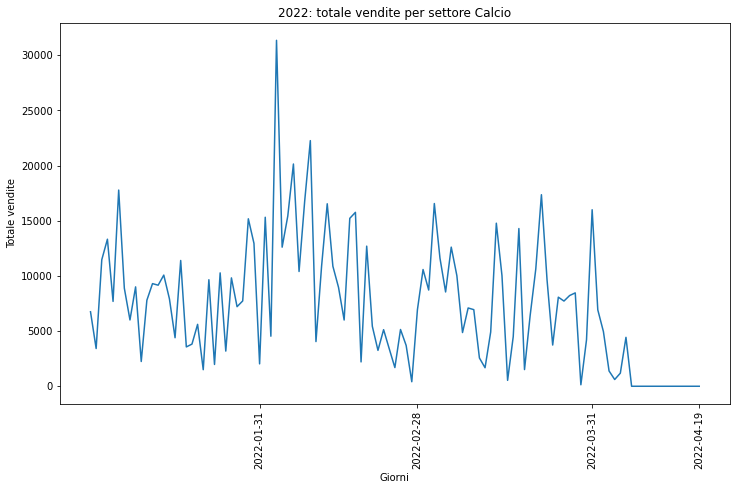

In [40]:
ls = ['Pesca', 'Calcio']#, 'Casual', 'Fitness', 'Running']
years = [i for i in range(2019,2023)]
for el in ls:
    # Dataset utile (totale vendite per settore per anno e giorno)
    dv = df2[(df2['settore'] == el) & (df2['data'] > '2019-04-18')]
    for year in years:
        dv1 = dv[dv['Anno'] == year]
        dv1 = dv1.sort_values(['data'])
        # Corpo
        plt.figure(figsize=(12,7))
        x = dv1['data']
        y = dv1['totale']
        plt.plot(x, y)
#         Estetica
        plt.xticks([dv1[dv1['Mese'] == mese].iloc[-1]['data'] for mese in dv1['Mese'].unique()], rotation = 90)
        plt.xlabel('Giorni')
        plt.ylabel('Totale vendite')
        plt.title('{}: totale vendite per settore {}'.format(str(year), el))
        # Mostra valori esatti per ogni osservazione
#                 for i,j in zip(x,y):
#                     plt.annotate(str(j),xy=(i,j))

        if year == 2016 or year == 2020:
            plt.title('{} (bisestile): totale vendite per settore {}'.format(str(year), el))